### CSE-221710302060-Shaik Shoaib Aslam

### Twitter Sentiment Analysis

In [1]:
# Importing Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [2]:
# Reading the dataset
tweets=pd.read_csv("train.csv",encoding = 'latin - 1')
tweets.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
tweets.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

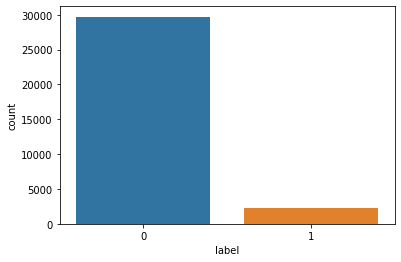

In [4]:
sns.countplot(tweets.label)

In [5]:
# Checking size of dataset
tweets.shape

(31962, 3)

In [6]:
# Checking for NULL values
tweets.isna().sum() # No NULL Values can be found

id       0
label    0
tweet    0
dtype: int64

In [7]:
# Checking Statistical data 
tweets.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


#### Cleaning with nltk

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ShoaibShaik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# Removing Stopwords
from nltk.corpus import stopwords # Stop words contain words like a,an,the,is,are,...etc
stop=stopwords.words("english")
stop.extend(["i'm","I'm"]) # adding additional stopwords
# Implementing stopwords on train data
tweets.tweet=tweets.tweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
tweets.head()

,id,label,tweet
0,1,0,@user father dysfunctional selfish drags kids ...
1,2,0,@user @user thanks #lyft credit can't use caus...
2,3,0,bihday majesty
3,4,0,#model love u take u time urÃ°ÂÂÂ±!!! Ã°ÂÂ...
4,5,0,factsguide: society #motivation


In [10]:
def clean(x):
    x=' '.join(re.sub("(@[A-Za-z0-9]+)|([^A-Za-z0-9']+)|(\w+:\/\/\S+)"," ",x).split())
    return x

In [11]:
# Removing Hyperlinks, userIDS
tweets.tweet = tweets.tweet.apply(clean)
tweets.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfun...
1,2,0,user thanks lyft credit can't use cause offer ...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [12]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ShoaibShaik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
# Applying Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
wnl = WordNetLemmatizer()
tweets.tweet=tweets.tweet.apply(lambda x:' '.join([wnl.lemmatize(word,'v') for word in x.split()])) # v stands for verb
tweets.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drag kid dysfunct...
1,2,0,user thank lyft credit can't use cause offer w...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [14]:
# Convert all the text data into lower case for flexibility
tweets.tweet=tweets.tweet.apply(lambda x:' '.join([word.lower() for word in x.split()]))

#### Applying same techniques for test data for cleaning

In [15]:
# Reading test data
X_test = pd.read_csv('test.csv',encoding='latin- 1')
# Removing Stopwords
X_test.tweet=X_test.tweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# Removing Hyperlinks, userIDS
X_test.tweet = X_test.tweet.apply(clean)
# Applying Lemmatization
wnl1 = WordNetLemmatizer()
X_test.tweet=X_test.tweet.apply(lambda x:' '.join([wnl1.lemmatize(word,'v') for word in x.split()])) # v stands for verb
X_test.tweet=X_test.tweet.apply(lambda x:' '.join([word.lower() for word in x.split()]))

#### Reading result data

In [16]:
y_test = pd.read_csv('result.csv')

#### Applying TFIDF Vectorizer for train and test data

In [17]:
## Importing TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [18]:
#Applying tfidf to train data
new_inp = tfidf.fit_transform(tweets.tweet)
new_inp
#Applying tfidf to test data
test_inp = tfidf.transform(X_test.tweet)
test_inp

<17197x35865 sparse matrix of type '<class 'numpy.float64'>'
	with 123657 stored elements in Compressed Sparse Row format>

#### SMOTE

In [19]:
#Importing SMOTETomek 
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42) # Creating an Object
X_train,y_train=smk.fit_sample(new_inp,tweets.label)

In [20]:
print(X_train.shape)
print(y_train.shape)

(59440, 35865)
(59440,)


In [21]:
# converting y_train from np.array to data frame to check for the balancing outcome
c=pd.DataFrame(y_train)
#  using index to generate counts of the label         
c.iloc[:,0].value_counts()       
# we can see that both the labels are now balanced

1    29720
0    29720
Name: label, dtype: int64

In [22]:
tweets.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

### Logistic regression

In [23]:
# importing logistic regression
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()  # creating object
reg.fit(X_train,y_train)  # fitting train data using the object

LogisticRegression()

In [24]:
#predicting on train data
lg_train_pred=reg.predict(X_train)
#predicting on test data
lg_test_pred=reg.predict(test_inp)

In [25]:
# Classification report on train and test
from sklearn.metrics import classification_report
print('---------------------------ON TRAIN DATA------------------------------------')
print(classification_report(y_train,lg_train_pred,digits=4))
print('--------------------------ON TEST DATA-------------------------------------')
print(classification_report(y_test.label,lg_test_pred,digits=4))

---------------------------ON TRAIN DATA------------------------------------
              precision    recall  f1-score   support

           0     0.9672    0.9681    0.9676     29720
           1     0.9680    0.9672    0.9676     29720

    accuracy                         0.9676     59440
   macro avg     0.9676    0.9676    0.9676     59440
weighted avg     0.9676    0.9676    0.9676     59440

--------------------------ON TEST DATA-------------------------------------
              precision    recall  f1-score   support

           0     0.9960    0.9396    0.9670     16282
           1     0.4646    0.9333    0.6204       915

    accuracy                         0.9392     17197
   macro avg     0.7303    0.9364    0.7937     17197
weighted avg     0.9678    0.9392    0.9485     17197



### Multinomial NB

In [26]:
# import BernNB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [27]:
#predicting on train data
mnb_train_pred=mnb.predict(X_train)
#predicting on test data
mnb_test_pred=mnb.predict(test_inp)

In [28]:
# Classification report on train and test
from sklearn.metrics import classification_report
print(classification_report(y_train,mnb_train_pred))
print('----------------------------------------------------------------')
print(classification_report(y_test.label,mnb_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     29720
           1       0.95      0.99      0.97     29720

    accuracy                           0.97     59440
   macro avg       0.97      0.97      0.97     59440
weighted avg       0.97      0.97      0.97     59440

----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     16282
           1       0.36      0.90      0.52       915

    accuracy                           0.91     17197
   macro avg       0.68      0.91      0.74     17197
weighted avg       0.96      0.91      0.93     17197



In [29]:
# recall on test data
from sklearn.metrics import recall_score
recall_score(y_test.label,mnb_test_pred)

0.9027322404371585

## Decision tree Classifier

In [30]:
# importing decision tree classifier from sklearn.tree package
from sklearn.tree import DecisionTreeClassifier
# creating object
dtree=DecisionTreeClassifier(criterion='entropy') 
# Fitting on train data
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [31]:
#predicting on train data
dtree_train_pred=dtree.predict(X_train)
#predicting on test data
dtree_test_pred=dtree.predict(test_inp)

In [32]:
# Classification report on train and test
# importing classification report from sklearn.metrics module
from sklearn.metrics import classification_report
print('----------------------------ON TRAIN DATA------------------------------------')
print(classification_report(y_train,dtree_train_pred,digits=4))
print('----------------------------ON TEST DATA------------------------------------')
print(classification_report(y_test.label,dtree_test_pred,digits=4))

----------------------------ON TRAIN DATA------------------------------------
              precision    recall  f1-score   support

           0     0.9998    1.0000    0.9999     29720
           1     1.0000    0.9998    0.9999     29720

    accuracy                         0.9999     59440
   macro avg     0.9999    0.9999    0.9999     59440
weighted avg     0.9999    0.9999    0.9999     59440

----------------------------ON TEST DATA------------------------------------
              precision    recall  f1-score   support

           0     0.9782    0.9686    0.9733     16282
           1     0.5237    0.6153    0.5658       915

    accuracy                         0.9498     17197
   macro avg     0.7509    0.7919    0.7696     17197
weighted avg     0.9540    0.9498    0.9517     17197



### Logistic Regression Hyperparameter


In [33]:
# Taking Parameters for performing HyperParameter Tuning
dual=[True,False] 
max_iter= [800]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

In [34]:
# Creating New Object for Hyper Parameter Tuning
new_lr = LogisticRegression(penalty='l2')
# Importing GridSearchCV for finding Best parameters
from sklearn.model_selection import GridSearchCV
# Initializing Object for GridSearchCV 
grid_search = GridSearchCV(estimator=new_lr, param_grid=param_grid, cv = 3, n_jobs=-1)
# Fitting grid_search on Train data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1.0, 1.5, 2.0, 2.5], 'dual': [True, False],
                         'max_iter': [800]})

In [35]:
# generating best parameters
grid_search.best_params_

{'C': 2.5, 'dual': False, 'max_iter': 800}

In [36]:
# Creating new object and fitting best parameters
final_lg = LogisticRegression(max_iter = 800, dual=False,C=2.5)
# fitting on train data
final_lg.fit(X_train,y_train)

LogisticRegression(C=2.5, max_iter=800)

In [37]:
#predicting on train data
final_lg_train_pred=final_lg.predict(X_train)
#predicting on test data
final_lg_test_pred=final_lg.predict(test_inp)

In [38]:
# After Hyper parameter Tuning
# Classification report on train and test
from sklearn.metrics import classification_report
print('---------------------------ON TRAIN DATA------------------------------------')
print(classification_report(y_train,final_lg_train_pred,digits=4))
print('-----------------------------ON TEST DATA-----------------------------------')
print(classification_report(y_test.label,final_lg_test_pred,digits=4))

---------------------------ON TRAIN DATA------------------------------------
              precision    recall  f1-score   support

           0     0.9889    0.9797    0.9843     29720
           1     0.9799    0.9890    0.9844     29720

    accuracy                         0.9844     59440
   macro avg     0.9844    0.9844    0.9844     59440
weighted avg     0.9844    0.9844    0.9844     59440

-----------------------------ON TEST DATA-----------------------------------
              precision    recall  f1-score   support

           0     0.9941    0.9437    0.9683     16282
           1     0.4736    0.9005    0.6207       915

    accuracy                         0.9414     17197
   macro avg     0.7338    0.9221    0.7945     17197
weighted avg     0.9664    0.9414    0.9498     17197



### MultinomialNB Hyperparameter

In [39]:
from sklearn.pipeline import Pipeline
tuned_parameters = {
    'clf__alpha': [1, 1e-1, 1e-2]
}
text_clf = Pipeline([('clf', MultinomialNB())])

In [40]:
clf = MultinomialNB()
mnb_res = GridSearchCV(text_clf,param_grid=tuned_parameters,cv=10)
mnb_res.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Pipeline(steps=[('clf', MultinomialNB())]),
             param_grid={'clf__alpha': [1, 0.1, 0.01]})

In [41]:
mnb_res.best_params_

{'clf__alpha': 0.01}

In [42]:
final_mnb = MultinomialNB(alpha=0.01)
final_mnb.fit(X_train,y_train)

MultinomialNB(alpha=0.01)

In [43]:
#predicting on train data
final_mnb_train_pred=final_mnb.predict(X_train)
#predicting on test data
final_mnb_test_pred=final_mnb.predict(test_inp)

In [44]:
# Classification report on train and test
from sklearn.metrics import classification_report
print(classification_report(y_train,final_mnb_train_pred))
print('----------------------------------------------------------------')
print(classification_report(y_test.label,final_mnb_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     29720
           1       0.98      0.99      0.98     29720

    accuracy                           0.98     59440
   macro avg       0.99      0.98      0.98     59440
weighted avg       0.99      0.98      0.98     59440

----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     16282
           1       0.40      0.74      0.52       915

    accuracy                           0.93     17197
   macro avg       0.69      0.84      0.74     17197
weighted avg       0.95      0.93      0.94     17197



### Decision Tree Classifier

In [ ]:
# taking best possible parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1)}

In [ ]:
#Import the GridSearchCV 
from sklearn.model_selection import GridSearchCV
# initialization of GridSearch with the parameters- ModelName and the dictionary of parameters
clf_new = DecisionTreeClassifier()
grid_search_new= GridSearchCV(estimator=clf_new, param_grid=grid_param,n_jobs=-1,cv=3,verbose=2)
# applying gridsearch onto dataset
grid_search_new.fit(X_train, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 30.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
grid_search_new.best_params_

In [45]:
# creating object and applying  best parameters
final_dtree = DecisionTreeClassifier(criterion= 'gini', max_depth= 31, min_samples_leaf= 1)
# fitting object on the model
final_dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=31)

In [46]:
#predicting on train data
final_dtree_train_pred=final_dtree.predict(X_train)
#predicting on test data
final_dtree_test_pred=final_dtree.predict(test_inp)

In [47]:
# Classification report on train and test
from sklearn.metrics import classification_report
print('-----------------------ON TRAIN DATA-----------------------------------------')
print(classification_report(y_train,final_dtree_train_pred,digits=4))
print('------------------------ON TEST DATA----------------------------------------')
print(classification_report(y_test.label,final_dtree_test_pred,digits=4))

-----------------------ON TRAIN DATA-----------------------------------------
              precision    recall  f1-score   support

           0     0.8561    0.9920    0.9191     29720
           1     0.9905    0.8332    0.9051     29720

    accuracy                         0.9126     59440
   macro avg     0.9233    0.9126    0.9121     59440
weighted avg     0.9233    0.9126    0.9121     59440

------------------------ON TEST DATA----------------------------------------
              precision    recall  f1-score   support

           0     0.9840    0.9717    0.9778     16282
           1     0.5886    0.7191    0.6473       915

    accuracy                         0.9583     17197
   macro avg     0.7863    0.8454    0.8126     17197
weighted avg     0.9630    0.9583    0.9603     17197



In [48]:
!pip install GetOldTweets3

In [49]:
import GetOldTweets3 as got

In [50]:
tag = input()
limit = 300

blacklivesmatter


In [60]:
# setting criteria using TweetCriteria model
# setQuerySearch take the given tag as parameter
# setMaxTweets takes limit i.e., number of tweets as a parameter
tweetCriteria = got.manager.TweetCriteria().setQuerySearch(tag)\
                                           .setMaxTweets(limit)
tweet = got.manager.TweetManager.getTweets(tweetCriteria)
# getting tweets

In [61]:
# tweets contain 2 columns time and tweet
# formatting into DataFrame 
tweet_in = [[i.date, i.text] for i in tweet]
input = pd.DataFrame(tweet_in)
input.head() # new DataFrame

,0,1
0,2020-07-14 12:52:37+00:00,Replying to @lennycurry I would agree if we we...
1,2020-07-14 12:52:36+00:00,BLACK LIVES MATTER.. ESPECIALLY ALL OF THE BLA...
2,2020-07-14 12:52:35+00:00,"Not to Black Lives Matter, learn political ide..."
3,2020-07-14 12:52:34+00:00,Black DA Blasts Black Lives Matter for Targeti...
4,2020-07-14 12:52:33+00:00,How many black people were killed when Africa ...


In [62]:
# creating an object and predicting the tweets from input data
k = final_dtree.predict(tfidf.transform(input.iloc[:,1]))

In [63]:
# adding predicted labels to the input data
input['label'] = pd.DataFrame(k)

In [64]:
# visualizing newly created columns
input.head()

,0,1,label
0,2020-07-14 12:52:37+00:00,Replying to @lennycurry I would agree if we we...,1
1,2020-07-14 12:52:36+00:00,BLACK LIVES MATTER.. ESPECIALLY ALL OF THE BLA...,1
2,2020-07-14 12:52:35+00:00,"Not to Black Lives Matter, learn political ide...",1
3,2020-07-14 12:52:34+00:00,Black DA Blasts Black Lives Matter for Targeti...,1
4,2020-07-14 12:52:33+00:00,How many black people were killed when Africa ...,0


In [65]:
# Checking value_counts()
input.label.value_counts()

1    254
0     46
Name: label, dtype: int64

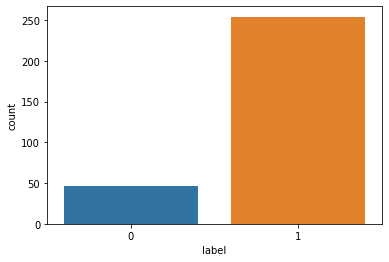

In [66]:
# Visualizing predicted column
sns.countplot(input.label)

#### Observations:
    '0' represents Positve
    '1' represents Negative
    Negative Tweets are more than Positive tweets 

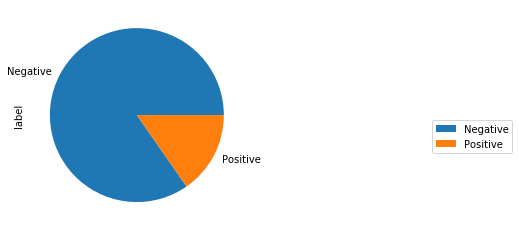

In [67]:
# Plotting on pie chart
import matplotlib.pyplot as plt
%matplotlib inline
input.label.value_counts().plot.pie(labels=['Negative','Positive']).legend(labels=['Negative','Positive']
                                           ,
                                           bbox_to_anchor=(2.25,0.5))

#### Observations:
    Negative tweets are more in number than positive tweets